## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import tensorflow.keras as keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/ttyoung/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [16]:
x_train = x_train[:5000]
x_test = x_test[:5000]
y_train = y_train[:5000]
y_test = y_test[:5000]

In [17]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    try:
        keras.backend.clear_session() # 把舊的 Graph 清掉
    except:
        pass
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 5000 samples
Epoch 1/50
5000/5000 [==============================] 

Train on 5000 samples, validate on 5000 samples
Epoch 1/50
5000/5000 [==============================] - 1s 250us/step - loss: 2.2101 - acc: 0.1808 - val_loss: 2.0598 - val_acc: 0.2676
Epoch 2/50
5000/5000 [==============================] - 1s 197us/step - loss: 1.9770 - acc: 0.2730 - val_loss: 1.9370 - val_acc: 0.3156
Epoch 3/50
5000/5000 [==============================] - 1s 220us/step - loss: 1.8673 - acc: 0.3368 - val_loss: 1.8656 - val_acc: 0.3384
Epoch 4/50
5000/5000 [==============================] - 1s 198us/step - loss: 1.7763 - acc: 0.3632 - val_loss: 1.8288 - val_acc: 0.3540
Epoch 5/50
5000/5000 [==============================] - 1s 192us/step - loss: 1.7180 - acc: 0.3892 - val_loss: 1.7955 - val_acc: 0.3710
Epoch 6/50
5000/5000 [==============================] - 1s 186us/step - loss: 1.6686 - acc: 0.4110 - val_loss: 1.8291 - val_acc: 0.3502
Epoch 7/50
5000/5000 [==============================] - 1s 185us/step - loss: 1.6097 - acc: 0.4262 - val_loss: 1.7399 - val_acc: 0.3864


5000/5000 [==============================] - 1s 173us/step - loss: 2.2199 - acc: 0.1958 - val_loss: 2.1782 - val_acc: 0.2400
Epoch 3/50
5000/5000 [==============================] - 1s 176us/step - loss: 2.1407 - acc: 0.2626 - val_loss: 2.1078 - val_acc: 0.2528
Epoch 4/50
5000/5000 [==============================] - 1s 175us/step - loss: 2.0642 - acc: 0.2704 - val_loss: 2.0406 - val_acc: 0.2690
Epoch 5/50
5000/5000 [==============================] - 1s 174us/step - loss: 2.0007 - acc: 0.2984 - val_loss: 1.9955 - val_acc: 0.2834
Epoch 6/50
5000/5000 [==============================] - 1s 175us/step - loss: 1.9520 - acc: 0.3080 - val_loss: 1.9526 - val_acc: 0.3114
Epoch 7/50
5000/5000 [==============================] - 1s 174us/step - loss: 1.9098 - acc: 0.3280 - val_loss: 1.9219 - val_acc: 0.3254
Epoch 8/50
5000/5000 [==============================] - 1s 174us/step - loss: 1.8770 - acc: 0.3394 - val_loss: 1.8968 - val_acc: 0.3310
Epoch 9/50
5000/5000 [==============================] - 1s 

5000/5000 [==============================] - 1s 178us/step - loss: 2.2672 - acc: 0.1520 - val_loss: 2.2629 - val_acc: 0.1562
Epoch 5/50
5000/5000 [==============================] - 1s 177us/step - loss: 2.2508 - acc: 0.1786 - val_loss: 2.2486 - val_acc: 0.1744
Epoch 6/50
5000/5000 [==============================] - 1s 195us/step - loss: 2.2354 - acc: 0.1870 - val_loss: 2.2356 - val_acc: 0.1842
Epoch 7/50
5000/5000 [==============================] - 1s 260us/step - loss: 2.2213 - acc: 0.1996 - val_loss: 2.2228 - val_acc: 0.2010
Epoch 8/50
5000/5000 [==============================] - 1s 202us/step - loss: 2.2078 - acc: 0.2138 - val_loss: 2.2109 - val_acc: 0.2076
Epoch 9/50
5000/5000 [==============================] - 1s 213us/step - loss: 2.1952 - acc: 0.2220 - val_loss: 2.1995 - val_acc: 0.2118
Epoch 10/50
5000/5000 [==============================] - 1s 216us/step - loss: 2.1830 - acc: 0.2318 - val_loss: 2.1892 - val_acc: 0.2222
Epoch 11/50
5000/5000 [==============================] - 1

5000/5000 [==============================] - 1s 219us/step - loss: 2.3233 - acc: 0.1166 - val_loss: 2.3298 - val_acc: 0.1148
Epoch 7/50
5000/5000 [==============================] - 1s 227us/step - loss: 2.3143 - acc: 0.1168 - val_loss: 2.3214 - val_acc: 0.1156
Epoch 8/50
5000/5000 [==============================] - 1s 193us/step - loss: 2.3071 - acc: 0.1160 - val_loss: 2.3138 - val_acc: 0.1118
Epoch 9/50
5000/5000 [==============================] - 1s 221us/step - loss: 2.3002 - acc: 0.1156 - val_loss: 2.3074 - val_acc: 0.1104
Epoch 10/50
5000/5000 [==============================] - 2s 380us/step - loss: 2.2946 - acc: 0.1156 - val_loss: 2.3018 - val_acc: 0.1108
Epoch 11/50
5000/5000 [==============================] - 1s 262us/step - loss: 2.2896 - acc: 0.1154 - val_loss: 2.2970 - val_acc: 0.1102
Epoch 12/50
5000/5000 [==============================] - 1s 293us/step - loss: 2.2852 - acc: 0.1174 - val_loss: 2.2927 - val_acc: 0.1110
Epoch 13/50
5000/5000 [==============================] -

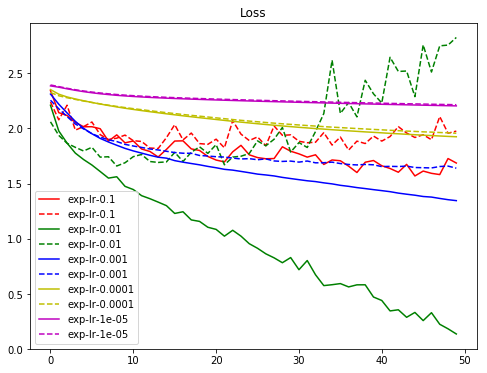

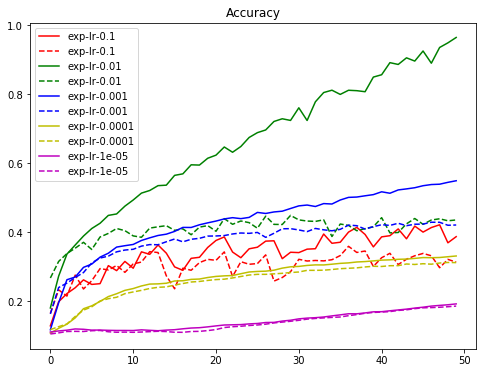

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現